In [ ]:
import os
import subprocess
import pandas as pd
import numpy as np
import math
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install skforecast

### Preparation

In [ ]:
ndvi_data = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/dailyNDVI - ee-chart.csv')
ndvi_data.head()

,Time,NDVI,Date
0,"Feb 24, 2000",NaN,2000-02-24
1,"Feb 25, 2000",NaN,2000-02-25
2,"Feb 26, 2000",0.228,2000-02-26
3,"Feb 27, 2000",0.223,2000-02-27
4,"Feb 28, 2000",0.226,2000-02-28


In [ ]:
ndvi_data.isnull().sum()

Time       0
NDVI    1261
Date       0
dtype: int64

In [ ]:
ndvi_data['NDVI'] = ndvi_data['NDVI'].fillna(ndvi_data['NDVI'].mean())
ndvi_data['NDVI'] = ndvi_data['NDVI'].interpolate()

In [ ]:
ndwi_data = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/NDWI_Daily - NDWI_Daily.csv')
ndwi_data.head()

,Time,NDWI,Date
0,"Feb 24, 2000",NaN,2000-02-24
1,"Feb 25, 2000",NaN,2000-02-25
2,"Feb 26, 2000",-0.017,2000-02-26
3,"Feb 27, 2000",-0.143,2000-02-27
4,"Feb 28, 2000",-0.182,2000-02-28


In [ ]:
ndwi_data.isnull().sum()

Time       0
NDWI    1077
Date       0
dtype: int64

In [ ]:
ndwi_data['NDWI'] = ndwi_data['NDWI'].fillna(ndwi_data['NDWI'].mean())
ndwi_data['NDWI'] = ndwi_data['NDWI'].interpolate()

In [ ]:
#ndvi_data['Date']=lst_data['Date']
ndwi_data=ndwi_data.drop(columns={'Time'})
#ndvi_data=ndvi_data.set_index('Date')
ndwi_data.head()

,NDWI,Date
0,-0.041613,2000-02-24
1,-0.041613,2000-02-25
2,-0.017000,2000-02-26
3,-0.143000,2000-02-27
4,-0.182000,2000-02-28


In [ ]:
ndwi_data['Date'] = pd.to_datetime(ndwi_data['Date'], format='%Y/%m/%d')
ndwi_data=ndwi_data.set_index('Date')
ndwi_data.head()

,NDWI
Date,
2000-02-24,-0.041613
2000-02-25,-0.041613
2000-02-26,-0.017000
2000-02-27,-0.143000
2000-02-28,-0.182000


In [ ]:
#ndvi_data = ndvi_data.asfreq('MS')
ndvi_data = ndvi_data.sort_index()
ndvi_data.head()

,NDVI
Date,
2000-02-24,0.228184
2000-02-25,0.228184
2000-02-26,0.074000
2000-02-27,0.267000
2000-02-28,0.259000


In [ ]:
ndwi_data.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/NDWI_Daily.csv', header=False)

In [ ]:
ndvi_data=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/NDVI_Daily.csv')
ndvi_data.head()

,2000-02-24,0.22818413793103448
0,2000-02-25,0.228184
1,2000-02-26,0.074000
2,2000-02-27,0.267000
3,2000-02-28,0.259000
4,2000-02-29,0.228184


In [ ]:
ndvi_data.shape

(8326, 2)

In [ ]:
evi_data = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/EVI_Daily - EVI_Daily.csv')
evi_data.tail()

,Time,EVI,Date
8321,"Feb 12, 2023",NaN,2023-02-12
8322,"Feb 13, 2023",0.170,2023-02-13
8323,"Feb 14, 2023",0.121,2023-02-14
8324,"Feb 15, 2023",0.184,2023-02-15
8325,"Feb 16, 2023",0.131,2023-02-16


In [ ]:
evi_data.isnull().sum()

Time       0
EVI     1077
Date       0
dtype: int64

In [ ]:
evi_data['EVI'] = evi_data['EVI'].fillna(evi_data['EVI'].mean())
evi_data['EVI'] = evi_data['EVI'].interpolate()

In [ ]:
#ndvi_data['Date']=lst_data['Date']
evi_data=evi_data.drop(columns={'Time'})
#ndvi_data=ndvi_data.set_index('Date')
evi_data.head()

,EVI,Date
0,0.187355,2000-02-24
1,0.187355,2000-02-25
2,0.083000,2000-02-26
3,0.134000,2000-02-27
4,0.121000,2000-02-28


In [ ]:
evi_data['Date'] = pd.to_datetime(evi_data['Date'], format='%Y/%m/%d')
evi_data=evi_data.set_index('Date')
evi_data.head()

In [ ]:
# evi_data.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/EVI_Daily.csv')

In [ ]:
modis_data = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/Daily_landsat_data.csv')
modis_data=modis_data.drop(columns = {'Unnamed: 0'})
modis_data['date'] = pd.to_datetime(modis_data['date'], format='%Y/%m/%d')
modis_data=modis_data.set_index('date')
modis_data=modis_data.asfreq('D')
modis_data=modis_data.sort_index()
modis_data.head()

,ndvi,evi,ndwi
date,,,
2000-02-24,0.183217,0.187355,-0.041613
2000-02-25,0.183217,0.187355,-0.041613
2000-02-26,0.228000,0.083000,-0.017000
2000-02-27,0.223000,0.134000,-0.143000
2000-02-28,0.226000,0.121000,-0.182000


In [ ]:
modis_data.shape

(8394, 3)

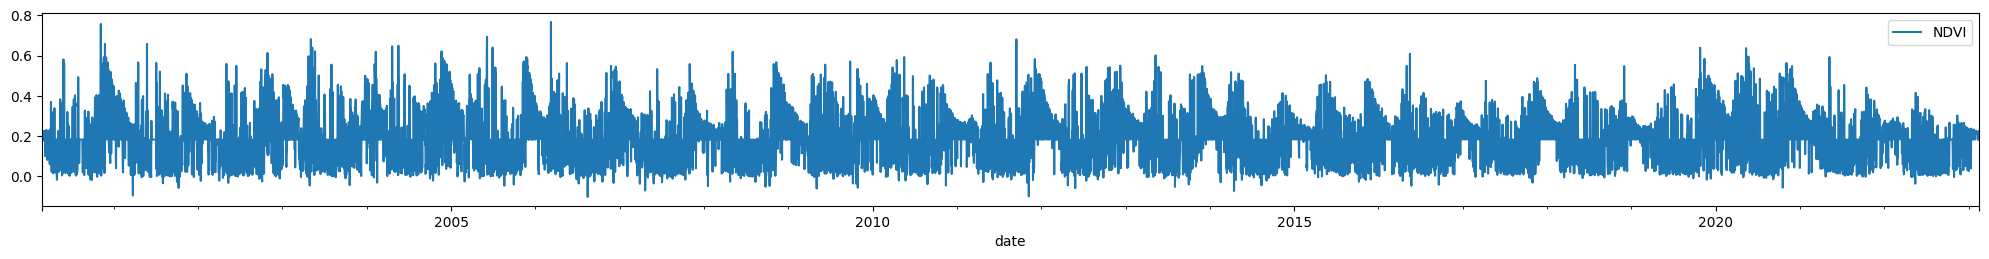

In [ ]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(25, 2.5))
modis_data['ndvi'].plot(ax=ax, label='NDVI')
ax.legend();

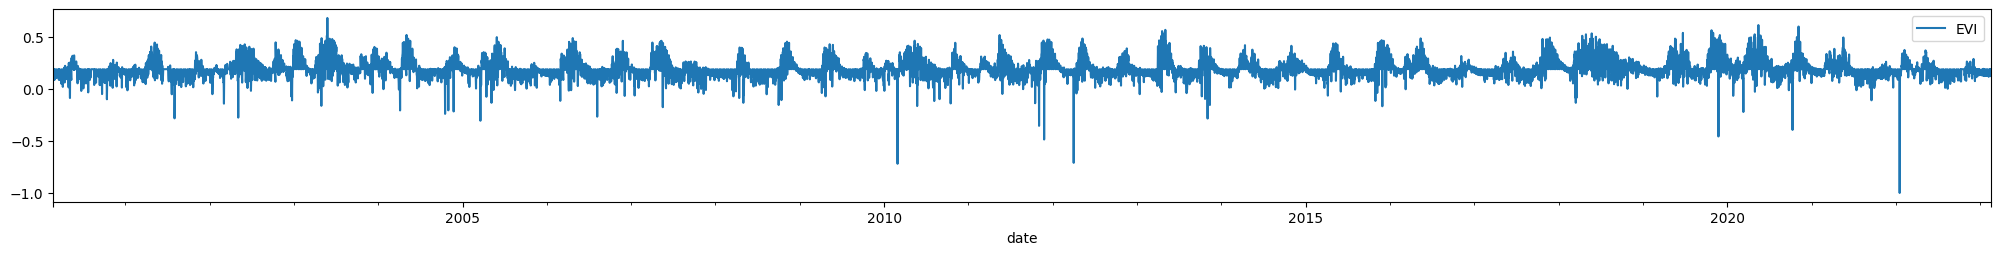

In [ ]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(25, 2.5))
modis_data['evi'].plot(ax=ax, label='EVI')
ax.legend();

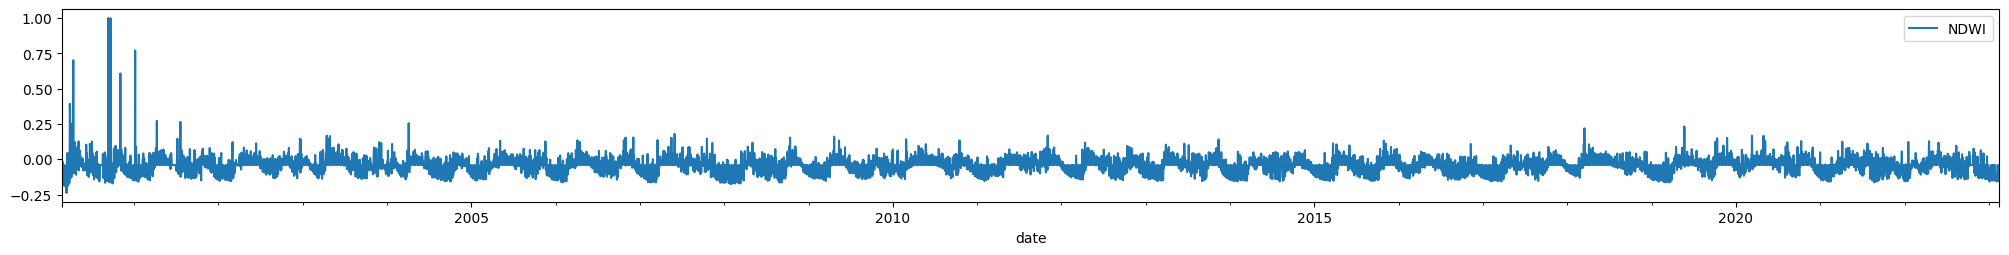

In [ ]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(25, 2.5))
modis_data['ndwi'].plot(ax=ax, label='NDWI')
ax.legend();

#### Testing for white noise & Random walk using the Ljung-Box test

> A random series drawn from independent identically distributed (IID) noise drawn from a normal distribution. Such a series is said to be a **white noise**.

> A **random walk** is defined by the sum of a white noise series. In other words, the value of the random walk is the cumulative sum of the preceding white noise series.

**NDVI**

In [ ]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(modis_data['ndvi'], lags=[40], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
40,10503.553827,0.0,10481.153004,0.0


> The value 10503.553827 is the value of the test statistic for the Ljung-Box test and 0.0 is its p-value as per the Chi-square(k=40) table.

> The value 10481.153004 is the test statistic of the Box-Pierce test and 0.0 is its p-value as per the Chi-square(k=40) tables.

> As we can see, both p-values are less than 0.01 and so we can say with 99% confidence that the vegitation index time series is not pure white noise.

##### Random Walks is a special case of the White Noise model
> we can detect random walk in the time series data by taking the first difference of the time series that is suspected to be a random walk, and run the white noise tests on the differenced series.

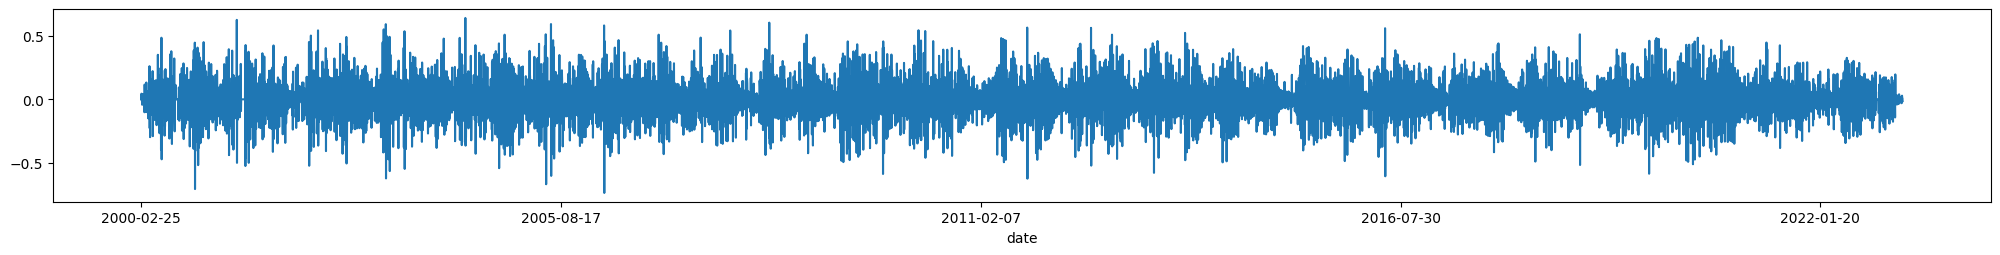

In [ ]:
diff_Y_i = modis_data['ndvi'].diff()
#drop the NAN in the first row
diff_Y_i = diff_Y_i.dropna()

#Let’s plot the diff-ed data set
diff_Y_i.plot(figsize=(25, 2.5))
plt.show()

In [ ]:
diag.acorr_ljungbox(diff_Y_i, lags=[40], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
40,2055.148971,0.0,2053.684167,0.0


> Notice that this time the test statistic’s value 2055.148971 reported by Ljung-Box, and 2053.684167 reported by Box-Pierce tests is much smaller. And the corresponding p-values detected on the Chi-square(k=40) tables are 0, which is below 0.05. so, we can reject the null hypothesis that the data (i.e. the differenced time series) is not white noise.

**EVI**

In [ ]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(modis_data['evi'], lags=[40], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
40,20487.946651,0.0,20452.373622,0.0


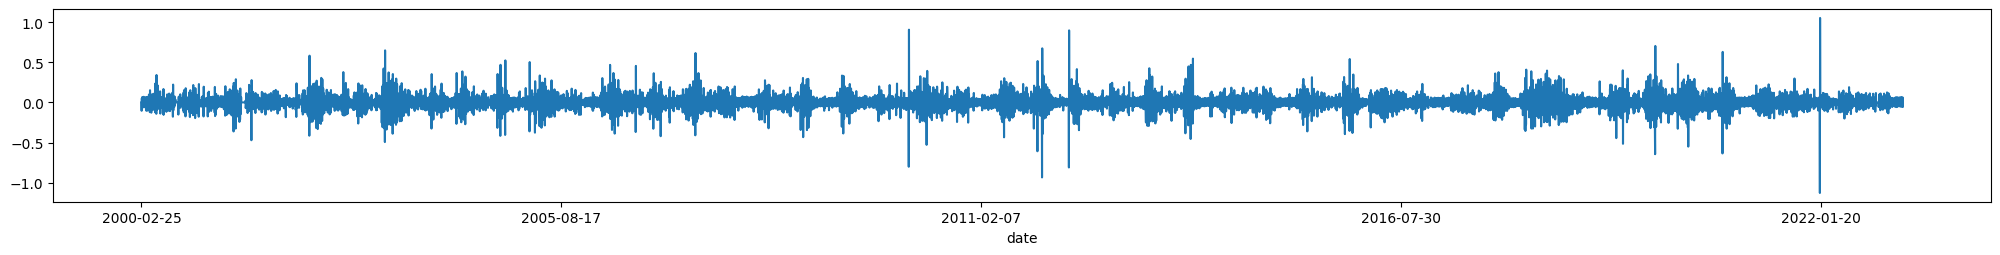

In [ ]:
diff_Y_i = modis_data['evi'].diff()
#drop the NAN in the first row
diff_Y_i = diff_Y_i.dropna()

#Let’s plot the diff-ed data set
diff_Y_i.plot(figsize=(25, 2.5))
plt.show()

In [ ]:
diag.acorr_ljungbox(diff_Y_i, lags=[40], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
40,5070.169465,0.0,5060.950276,0.0


**ndwi**

In [ ]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(modis_data['ndwi'], lags=[40], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
40,20468.758491,0.0,20430.552006,0.0


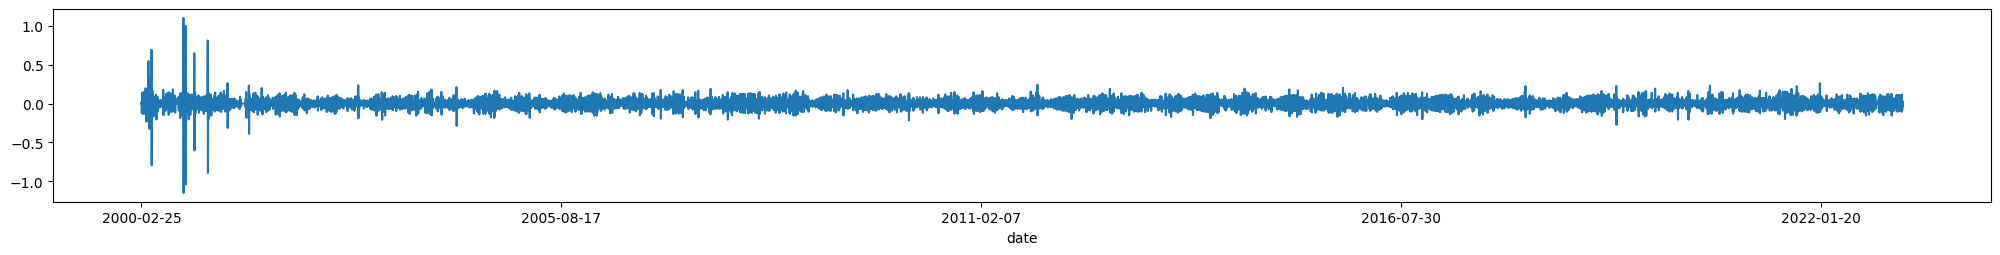

In [ ]:
diff_Y_i = modis_data['ndwi'].diff()
#drop the NAN in the first row
diff_Y_i = diff_Y_i.dropna()

#Let’s plot the diff-ed data set
diff_Y_i.plot(figsize=(25, 2.5))
plt.show()

In [ ]:
diag.acorr_ljungbox(diff_Y_i, lags=[40], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
40,4298.796984,0.0,4292.144635,0.0


#### Exploratory Data Analysis

In [ ]:
# Descriptive statistics
display(modis_data.describe()) # For numeric columns

print("\nSkewness: \n", modis_data.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", modis_data.kurtosis(axis = 0, skipna = True))

,ndvi,evi,ndwi
count,8394.000000,8394.000000,8394.000000
mean,0.183217,0.187355,-0.041613
std,0.135015,0.093700,0.060252
min,-0.102000,-1.000000,-0.239000
25%,0.060000,0.136000,-0.080000
50%,0.183217,0.185000,-0.041613
75%,0.270000,0.221000,-0.004000
max,0.767000,0.679000,1.000000



Skewness: 
 ndvi    0.612033
evi    -0.058036
ndwi    2.041187
dtype: float64

Kurtosis: 
 ndvi    -0.104960
evi      7.569085
ndwi    29.607750
dtype: float64


> **Skewness** assesses the extent to which a variable’s distribution is symmetrical.
>
* between −1 and +1 is considered excellent
* between −2 and +2 is generally considered acceptable

* beyond −2 and +2 are considered indicative of substantial abnormality



> **Kurtosis** *is a measure of whether the distribution is too peaked or normal.*
>
* if > +2, the distribution is too peaked.
* if < −2, indicates a distribution is too flat.
*   When both skewness and kurtosis are close to zero, the pattern of responses is considered a normal distribution

> **High kurtosis** in a data set is an indicator that data has heavy tails or outliers.

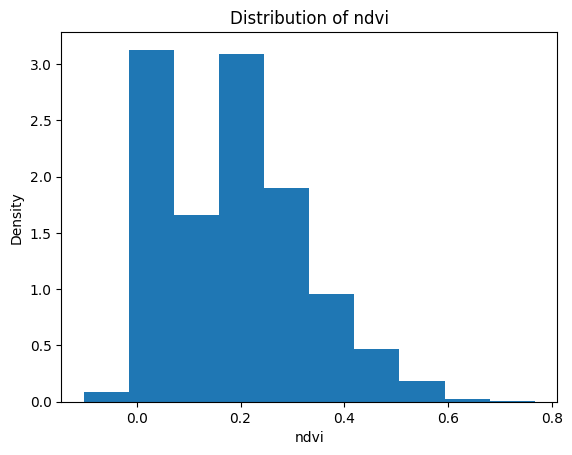

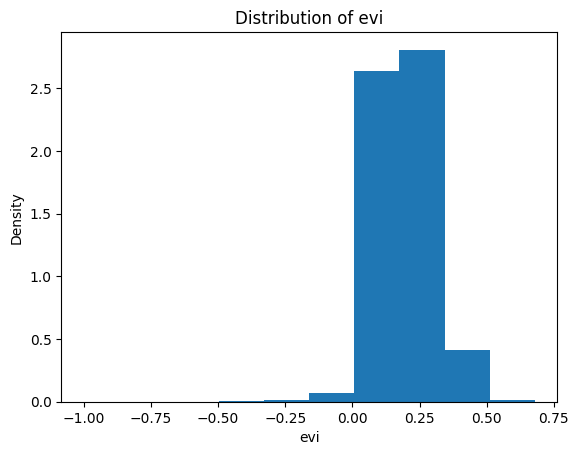

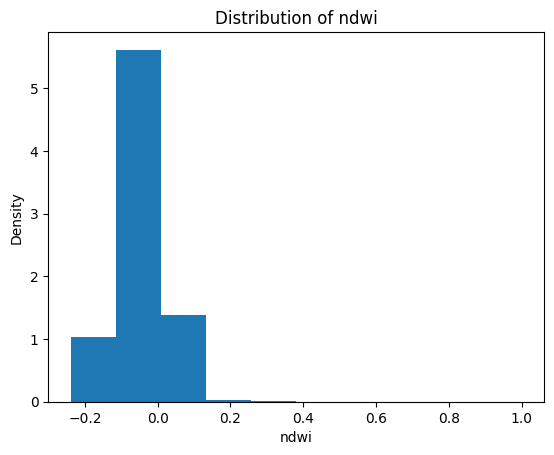

In [ ]:
col=['ndvi','evi','ndwi']
for i in col:
  plt.figure()
  plt.hist(modis_data[i], density = True)
  x_name = i
  plt.xlabel(x_name)
  y_name = 'Density'
  plt.ylabel(y_name)
  plt.title('Distribution of {x_name}'.format(x_name=x_name))

#### downsampling our data to weekly basis

In [ ]:
Indices_data = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/Daily_landsat_data.csv')
Indices_data = Indices_data[['date','ndvi','evi','ndwi']]
Indices_data['date'] = pd.to_datetime(Indices_data['date'], format='%Y/%m/%d')
Indices_data.head()

,date,ndvi,evi,ndwi
0,2000-02-24,0.183217,0.187355,-0.041613
1,2000-02-25,0.183217,0.187355,-0.041613
2,2000-02-26,0.228000,0.083000,-0.017000
3,2000-02-27,0.223000,0.134000,-0.143000
4,2000-02-28,0.226000,0.121000,-0.182000


In [ ]:
df_downsampled = Indices_data[['date',
                     'ndvi',
                     'evi',
                     'ndwi',
                    ]].resample('7D', on='date').mean().reset_index(drop=False)
df_downsampled.head()

,date,ndvi,evi,ndwi
0,2000-02-24,0.205664,0.146724,-0.090834
1,2000-03-02,0.206174,0.129765,-0.145945
2,2000-03-09,0.202571,0.121857,-0.171143
3,2000-03-16,0.182633,0.140673,-0.101175
4,2000-03-23,0.174919,0.119622,-0.025088


Text(0.5, 1.0, 'weekly NDWI')

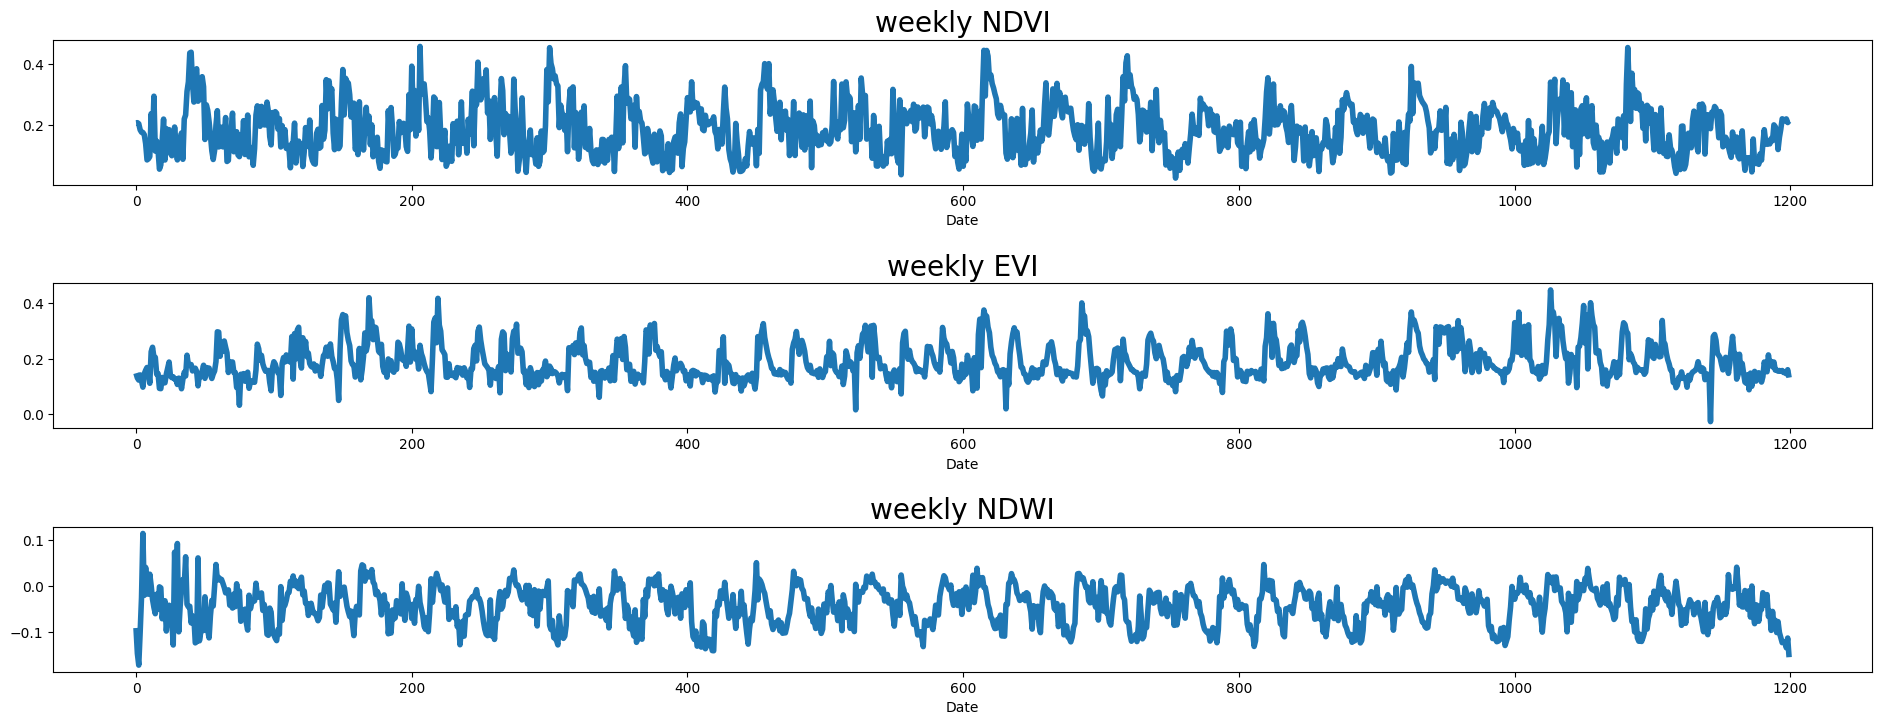

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20, 8),squeeze=False)
fig.tight_layout(pad=5)
plt.style.use('fivethirtyeight')

# Graph for SPI
axes[0][0].plot(df_downsampled["ndvi"])
axes[0][0].set_xlabel("Date")
axes[0][0].set_title('weekly NDVI')

# Graph for NDVI
axes[1][0].plot(df_downsampled["evi"])
axes[1][0].set_xlabel("Date")
axes[1][0].set_title('weekly EVI')

# Graph for NDWI
axes[2][0].plot(df_downsampled["ndwi"])
axes[2][0].set_xlabel("Date")
axes[2][0].set_title('weekly NDWI')

#### Exploratory Data Analysis

In [ ]:
# Descriptive statistics
display(df_downsampled.describe()) # For numeric columns

print("\nSkewness: \n", df_downsampled.skew(axis = 0, skipna = True))
print("\nKurtosis: \n", df_downsampled.kurtosis(axis = 0, skipna = True))

,ndvi,evi,ndwi
count,1200.000000,1200.000000,1200.000000
mean,0.183237,0.187315,-0.041693
std,0.080674,0.063876,0.040450
min,0.023571,-0.028235,-0.171143
25%,0.121888,0.144181,-0.069736
50%,0.175531,0.168551,-0.038730
75%,0.237391,0.221194,-0.011052
max,0.457602,0.448143,0.113627



Skewness: 
 ndvi    0.558176
evi     0.842842
ndwi   -0.195108
dtype: float64

Kurtosis: 
 ndvi    0.017075
evi     0.611385
ndwi   -0.333122
dtype: float64


> **Skewness** assesses the extent to which a variable’s distribution is symmetrical.
>
* between −1 and +1 is considered excellent
* between −2 and +2 is generally considered acceptable

* beyond −2 and +2 are considered indicative of substantial abnormality



> **Kurtosis** *is a measure of whether the distribution is too peaked or normal.*
>
* if > +2, the distribution is too peaked.
* if < −2, indicates a distribution is too flat.
*   When both skewness and kurtosis are close to zero, the pattern of responses is considered a normal distribution

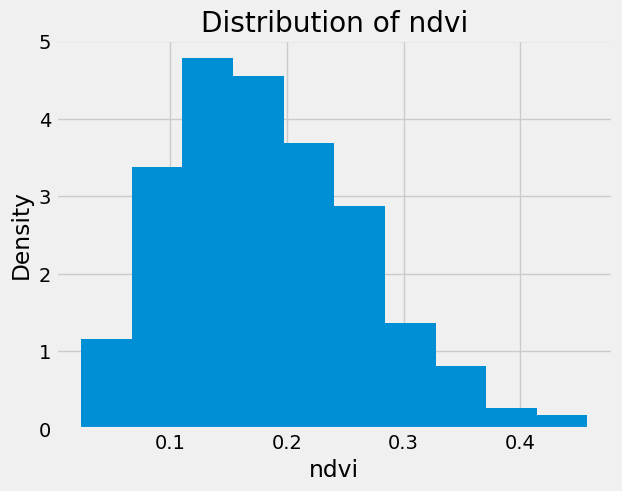

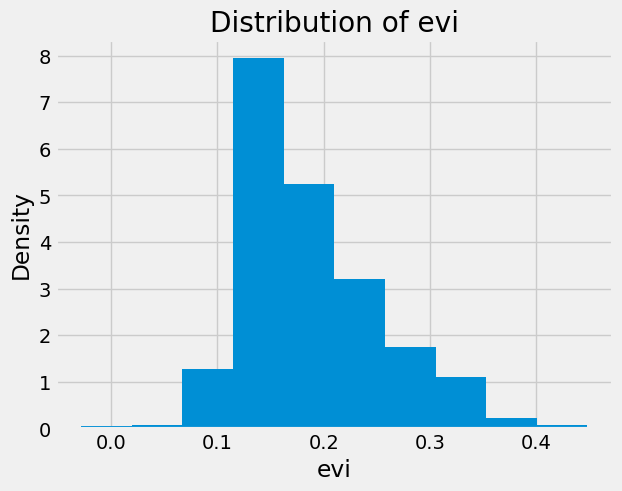

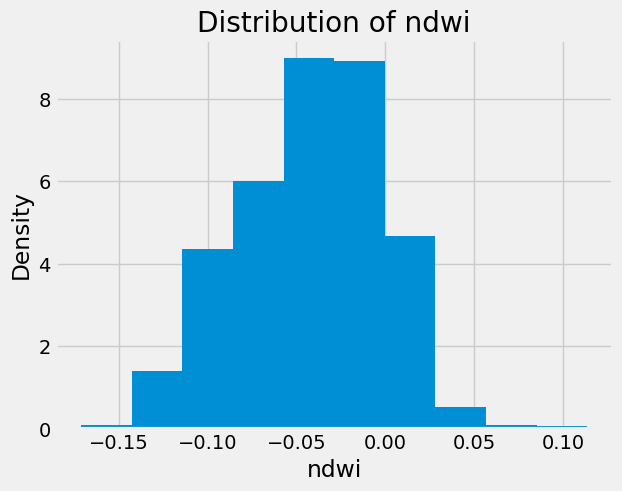

In [ ]:
col=['ndvi','evi','ndwi']
for i in col:
  plt.figure()
  plt.hist(df_downsampled[i], density = True)
  x_name = i
  plt.xlabel(x_name)
  y_name = 'Density'
  plt.ylabel(y_name)
  plt.title('Distribution of {x_name}'.format(x_name=x_name))

### Cheak the time interval and the chronological order of the data

In [ ]:
# Sort values by timestamp (not necessary in this case)
df_downsampled = df_downsampled.sort_values(by='date')

# Check time intervals
df_downsampled['Time_Interval'] = df_downsampled['date'] - df_downsampled['date'].shift(1)

df_downsampled[['date', 'Time_Interval']].head()

,date,Time_Interval
0,2000-02-24,NaT
1,2000-03-02,7 days
2,2000-03-09,7 days
3,2000-03-16,7 days
4,2000-03-23,7 days


In [ ]:
print(f"{df_downsampled['Time_Interval'].value_counts()}")
df_downsampled = df_downsampled.drop('Time_Interval', axis=1)
df_downsampled.head()

7 days    1199
Name: Time_Interval, dtype: int64


,date,ndvi,evi,ndwi
0,2000-02-24,0.205664,0.146724,-0.090834
1,2000-03-02,0.206174,0.129765,-0.145945
2,2000-03-09,0.202571,0.121857,-0.171143
3,2000-03-16,0.182633,0.140673,-0.101175
4,2000-03-23,0.174919,0.119622,-0.025088


### Timeseries Component Decomposition

> The characteristics of a time series are

*   Trend and Level
*   Seasonality
*  Stationary







In [ ]:
df_downsampled['date'] = pd.to_datetime(df_downsampled['date'], format='%Y/%m/%d')
df_downsampled=df_downsampled.set_index('date')
df_downsampled=df_downsampled.asfreq('7D')
df_downsampled

,ndvi,evi,ndwi
date,,,
2000-02-24,0.205664,0.146724,-0.090834
2000-03-02,0.206174,0.129765,-0.145945
2000-03-09,0.202571,0.121857,-0.171143
2000-03-16,0.182633,0.140673,-0.101175
2000-03-23,0.174919,0.119622,-0.025088
...,...,...,...
2023-01-19,0.216745,0.149336,-0.120945
2023-01-26,0.212317,0.151622,-0.120802
2023-02-02,0.218714,0.144714,-0.133571


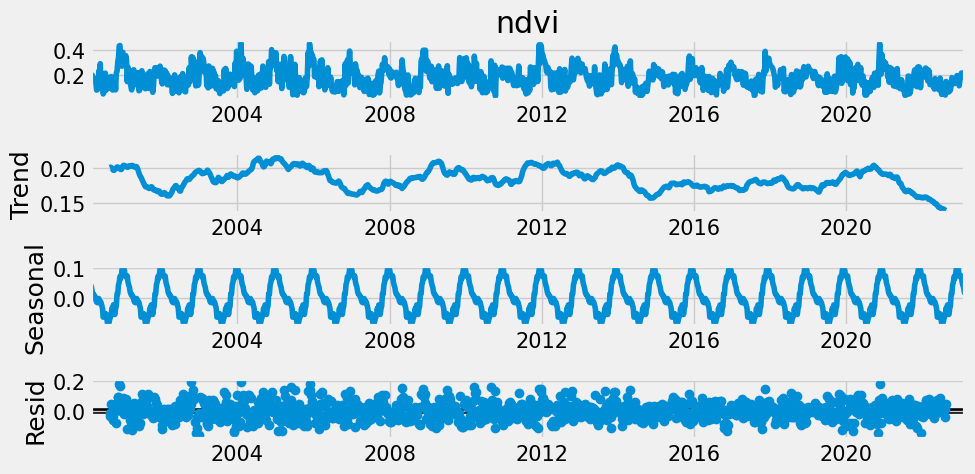

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
plt.rc('figure',figsize=(10,5))
plt.rc('font',size=15)
result = seasonal_decompose(df_downsampled.ndvi,model='additive')
fig = result.plot()

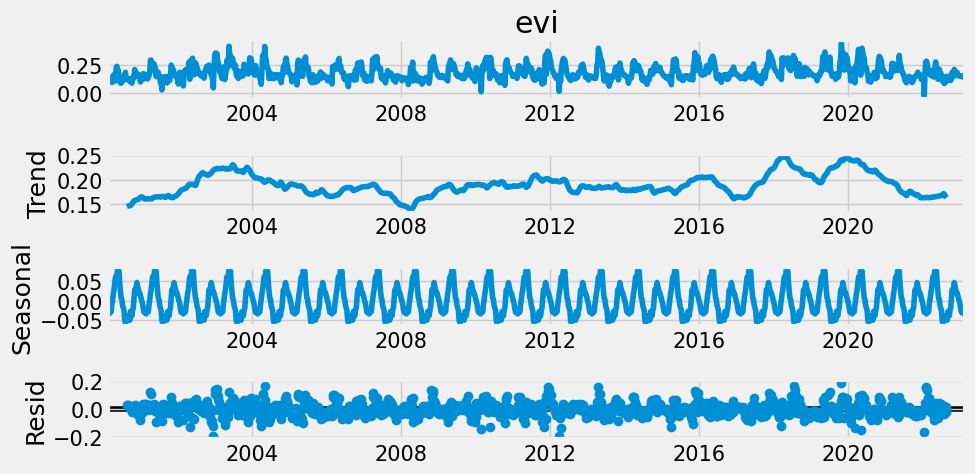

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
plt.rc('figure',figsize=(10,5))
plt.rc('font',size=15)
result = seasonal_decompose(df_downsampled.evi,model='additive')
fig = result.plot()

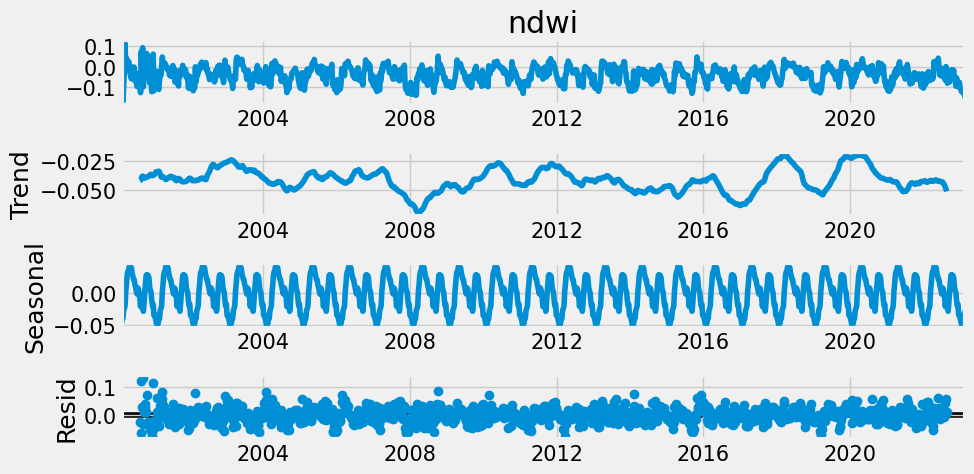

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
plt.rc('figure',figsize=(10,5))
plt.rc('font',size=15)
result = seasonal_decompose(df_downsampled.ndwi,model='additive')
fig = result.plot()

> We can see wave but steady trend and extream seasonality in this data.


In [ ]:
#let’s test the series’ stationarity using Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_downsampled['ndvi'])
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF critical values:', crit_vals)

ADF test statistic: -10.444911686259383
ADF p-values: 1.4887861131532235e-18
ADF critical values: {'1%': -3.4359180705360823, '5%': -2.863998730827617, '10%': -2.5680790795038577}


In [ ]:
#let’s test the series’ stationarity using Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_downsampled['evi'])
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF critical values:', crit_vals)

ADF test statistic: -4.752664266998684
ADF p-values: 6.693538595096502e-05
ADF critical values: {'1%': -3.4359228156852093, '5%': -2.8640008242280555, '10%': -2.5680801943923828}


In [ ]:
#let’s test the series’ stationarity using Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(df_downsampled['ndwi'])
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF critical values:', crit_vals)

ADF test statistic: -5.66816217886265
ADF p-values: 9.050486170843799e-07
ADF critical values: {'1%': -3.4359180705360823, '5%': -2.863998730827617, '10%': -2.5680790795038577}




> If this p-value < 0.05 you can reject the null hypothesis (reject non-stationarity i.e. data is stationary => no trend)

>In this case, we can reject the null hypothesis and will have to assume that the data is stationary (no trend).

> ADF statistic < critical value: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


### Autocorrelation Analysis

> Autocorrelation is the correlation between a time series’ current value with past values. If this is the case, you can use present values to better predict future values.

> The PACF is an alternative to the ACF. Rather than giving the autocorrelations, it gives you the partial autocorrelation. This autocorrelation is called partial, because with each step back in the past, only additional autocorrelation is listed.

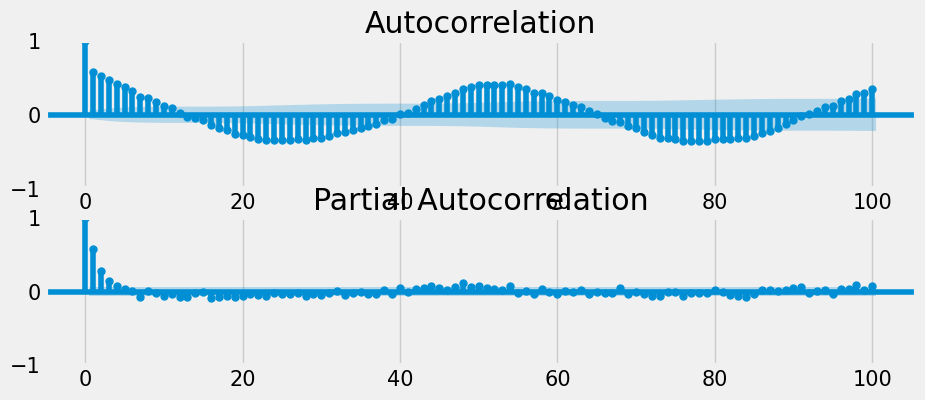

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))

plot_acf(df_downsampled['ndvi'],lags=100, ax=ax[0])
plot_pacf(df_downsampled['ndvi'],lags=100, ax=ax[1])
plt.show()

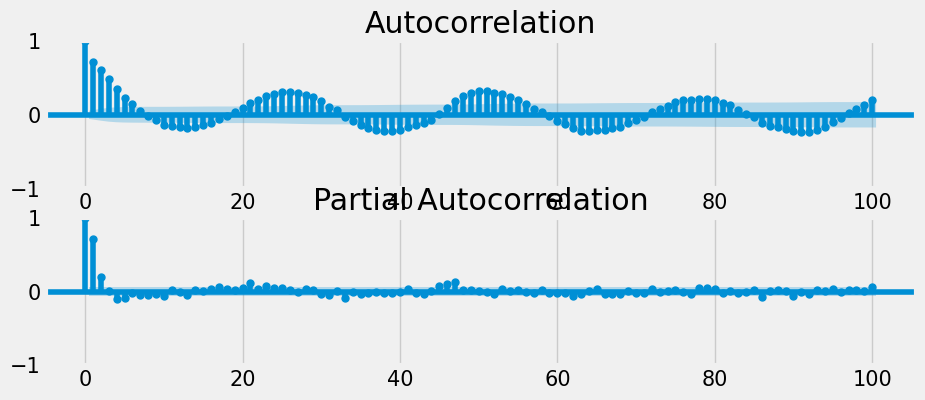

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))

plot_acf(df_downsampled['evi'],lags=100, ax=ax[0])
plot_pacf(df_downsampled['evi'],lags=100, ax=ax[1])
plt.show()

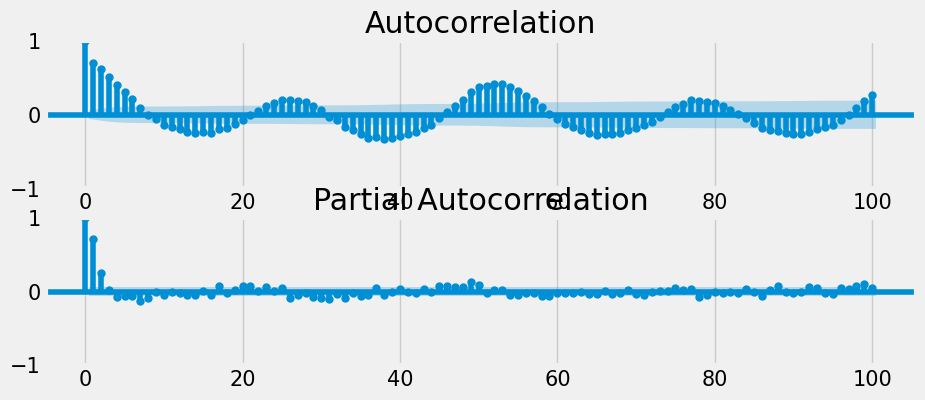

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))

plot_acf(df_downsampled['ndwi'],lags=100, ax=ax[0])
plot_pacf(df_downsampled['ndwi'],lags=100, ax=ax[1])
plt.show()

> Notice how the ACF plot looks like sinusoidal function. This is a hint for seasonality, and you can find its value by finding the period in the plot. Seasonality refers to periodic fluctuations.

### Anomaly detecton and correction

<Axes: xlabel='date'>

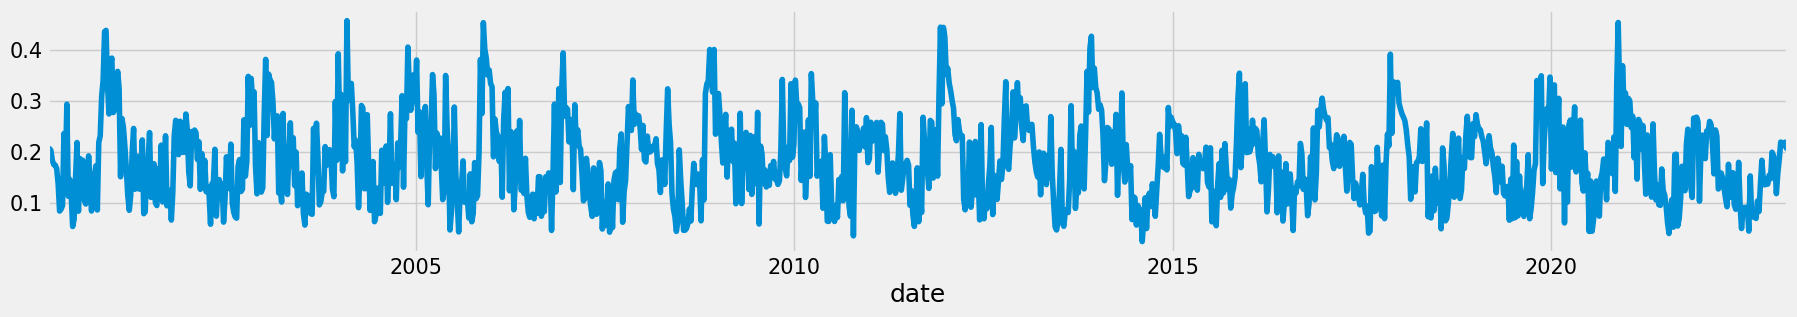

In [ ]:
plt.rc('figure',figsize=(20,3))
plt.rc('font',size=15)
df_downsampled['ndvi'].plot()

<Axes: xlabel='date'>

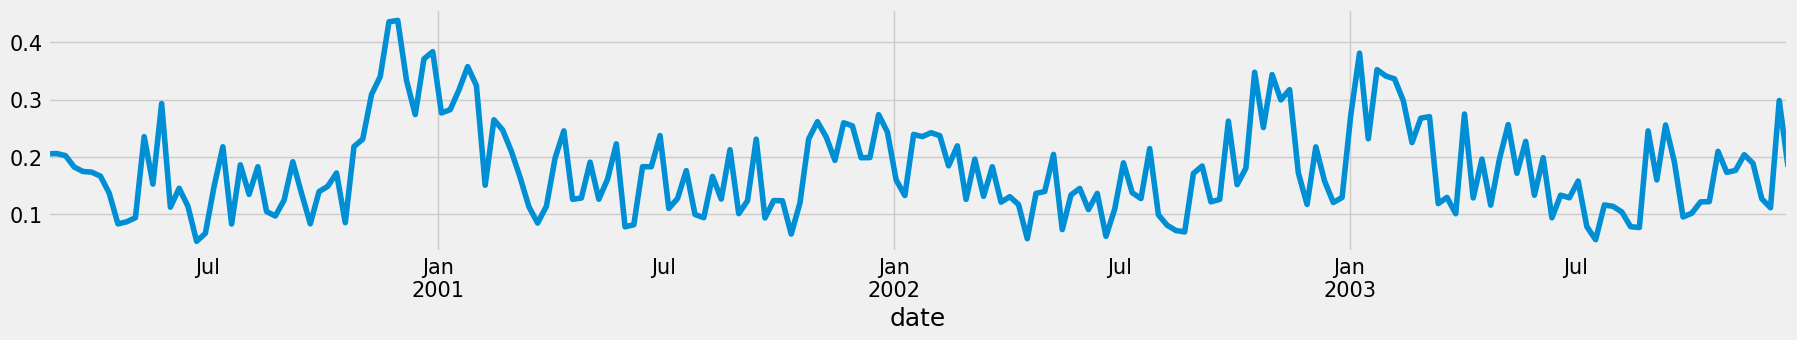

In [ ]:
df_downsampled[:200]['ndvi'].plot()

> here we can see that htere is sinusoidal cycle i.e. seasonality every two year

**Outlier detection using Classification and Regression Trees (CART)**

>Isolation Forest detects anomalies purely based on the fact that anomalies are data points that are few and different. The anomalies isolation is implemented without employing any distance or density measure.

* contamination = outliers_fraction tells the model what proportion of outliers are present in the data.
* This is a trial/error metric.
* Fit and predict (data) performs outlier detection on data, and returns 1 for normal, -1 for the anomaly.

In [ ]:
all_downsampled=df_downsampled[['ndvi','evi','ndwi']].squeeze()
all_downsampled

,ndvi,evi,ndwi
date,,,
2000-02-24,0.205664,0.146724,-0.090834
2000-03-02,0.206174,0.129765,-0.145945
2000-03-09,0.202571,0.121857,-0.171143
2000-03-16,0.182633,0.140673,-0.101175
2000-03-23,0.174919,0.119622,-0.025088
...,...,...,...
2023-01-19,0.216745,0.149336,-0.120945
2023-01-26,0.212317,0.151622,-0.120802
2023-02-02,0.218714,0.144714,-0.133571


In [ ]:
from sklearn.ensemble import IsolationForest
ndvidata=all_downsampled['ndvi'].squeeze()
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(ndvidata.values.reshape(-1, 1))
ndvidata = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(ndvidata)

IsolationForest(contamination=0.01)

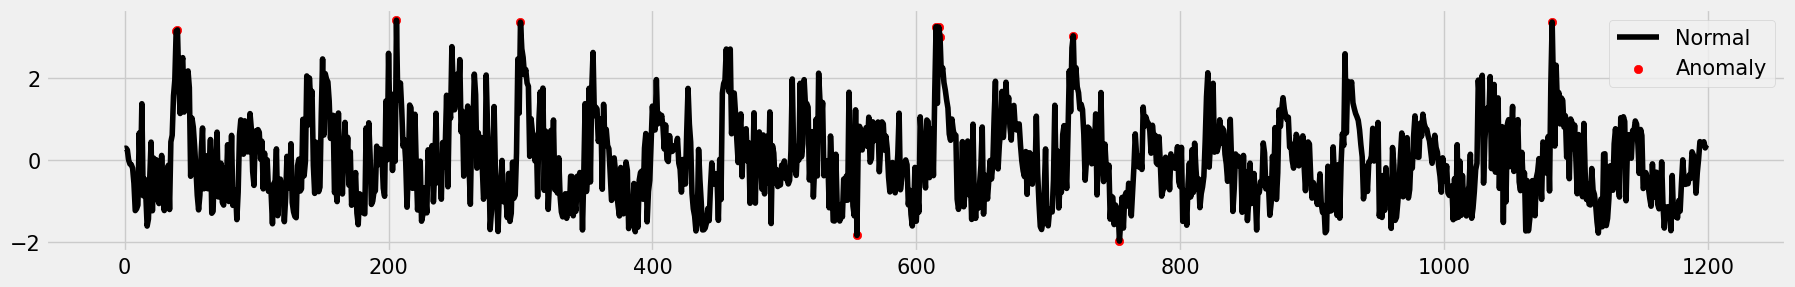

In [ ]:
ndvidata['anomaly'] = model.predict(ndvidata[0].values.reshape(-1, 1))
# visualization
fig, ax = plt.subplots(figsize=(20,3))
a = ndvidata.loc[ndvidata['anomaly'] == -1, [0]] #anomaly
ax.plot(ndvidata.index, ndvidata[0], color='black', label = 'Normal')
ax.scatter(a.index,a[0], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [ ]:
from sklearn.ensemble import IsolationForest
evidata=all_downsampled['evi'].squeeze()
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(evidata.values.reshape(-1, 1))
evidata = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(evidata)

IsolationForest(contamination=0.01)

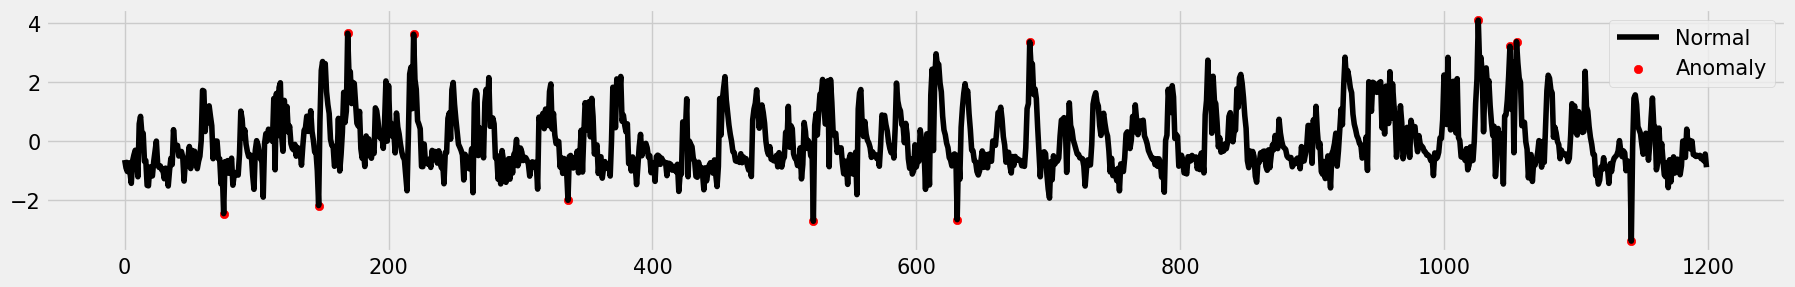

In [ ]:
evidata['anomaly'] = model.predict(evidata[0].values.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(20,3))
a = evidata.loc[evidata['anomaly'] == -1, [0]] #anomaly
ax.plot(evidata.index, evidata[0], color='black', label = 'Normal')
ax.scatter(a.index,a[0], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [ ]:
from sklearn.ensemble import IsolationForest
ndwidata=all_downsampled['ndwi'].squeeze()
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(ndwidata.values.reshape(-1, 1))
ndwidata = pd.DataFrame(np_scaled)
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(ndwidata)

IsolationForest(contamination=0.01)

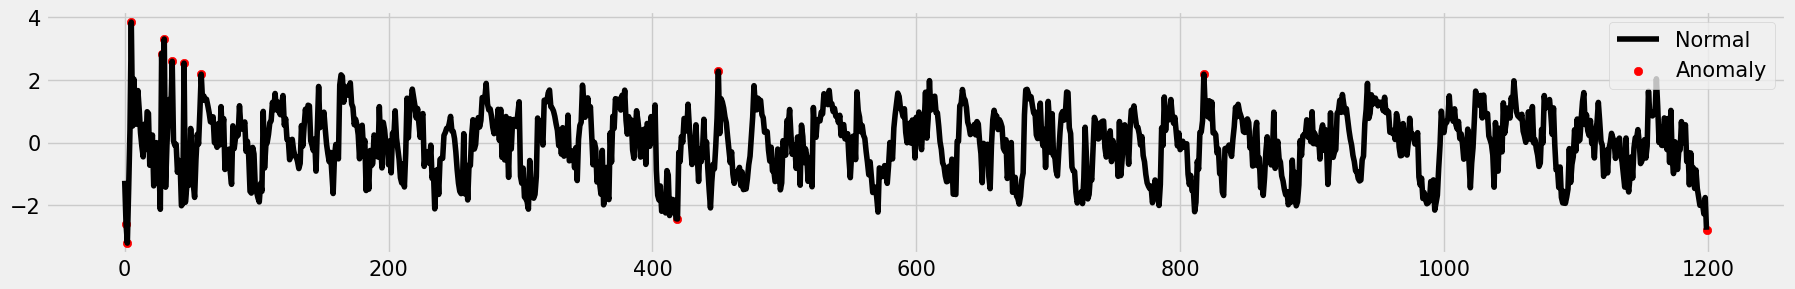

In [ ]:
ndwidata['anomaly'] = model.predict(ndwidata[0].values.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(20,3))
a = ndwidata.loc[ndwidata['anomaly'] == -1, [0]] #anomaly
ax.plot(ndwidata.index, ndwidata[0], color='black', label = 'Normal')
ax.scatter(a.index,a[0], color='red', label = 'Anomaly')
plt.legend()
plt.show();

**Anomaly treatment**

> replace the anomaly value with mean of particular month inorder to smoothen out the outlier.

In [ ]:
ndvidata ['date']=pd.to_datetime(all_downsampled.index, format='%m/%d/%Y')
ndvidata=ndvidata.set_index('date')
ndvidata['ndvi']=all_downsampled['ndvi']
ndvidata

,0,anomaly,ndvi
date,,,
2000-02-24,0.278111,1,0.205664
2000-03-02,0.284429,1,0.206174
2000-03-09,0.239757,1,0.202571
2000-03-16,-0.007490,1,0.182633
2000-03-23,-0.103153,1,0.174919
...,...,...,...
2023-01-19,0.415523,1,0.216745
2023-01-26,0.360605,1,0.212317
2023-02-02,0.439940,1,0.218714


In [ ]:
# Calculate the average production per month
monthly_avg = all_downsampled.groupby(all_downsampled.index.month).mean()
monthly_avg

,ndvi,evi,ndwi
date,,,
1,0.254962,0.171260,-0.083038
2,0.221791,0.159242,-0.083261
3,0.190778,0.176656,-0.056594
4,0.170813,0.231865,-0.003884
5,0.169636,0.256484,-0.001851
6,0.127747,0.196953,-0.021919
7,0.111959,0.153086,-0.037066
8,0.119579,0.142293,-0.052095
9,0.144520,0.150521,-0.056306


In [ ]:
ndvianomaly = ndvidata.loc[ndvidata['anomaly'] == -1, [0]]
ndvianomaly.index = pd.to_datetime(ndvianomaly.index, format='%d/%m/%Y')
ndvianomaly

,0
date,
2000-11-23,3.134834
2000-11-30,3.164950
2004-02-05,3.402336
2005-11-24,3.352733
2010-10-14,-1.841800
2011-12-08,3.242897
2011-12-22,3.237583
2011-12-29,3.003740
2013-12-05,3.021455


In [ ]:
# Impute these values
for date in ndvianomaly.index:
  ndvidata.loc[ndvidata.index == date, 'ndvi'] = monthly_avg.loc[date.month, 'ndvi'] #odata.loc[odata.index == date, 'ndvi'].fillna(monthly_avg.loc[date.month, 'ndvi'])

In [ ]:
ndvidata.loc[ndvidata['anomaly'] == -1, 'ndvi']

date
2000-11-23    0.244511
2000-11-30    0.244511
2004-02-05    0.221791
2005-11-24    0.244511
2010-10-14    0.171454
2011-12-08    0.272535
2011-12-22    0.272535
2011-12-29    0.272535
2013-12-05    0.272535
2014-08-07    0.119579
2020-11-19    0.244511
Name: ndvi, dtype: float64

In [ ]:
ndvidata

,0,anomaly,ndvi
date,,,
2000-02-24,0.278111,1,0.205664
2000-03-02,0.284429,1,0.206174
2000-03-09,0.239757,1,0.202571
2000-03-16,-0.007490,1,0.182633
2000-03-23,-0.103153,1,0.174919
...,...,...,...
2023-01-19,0.415523,1,0.216745
2023-01-26,0.360605,1,0.212317
2023-02-02,0.439940,1,0.218714


<Axes: xlabel='date'>

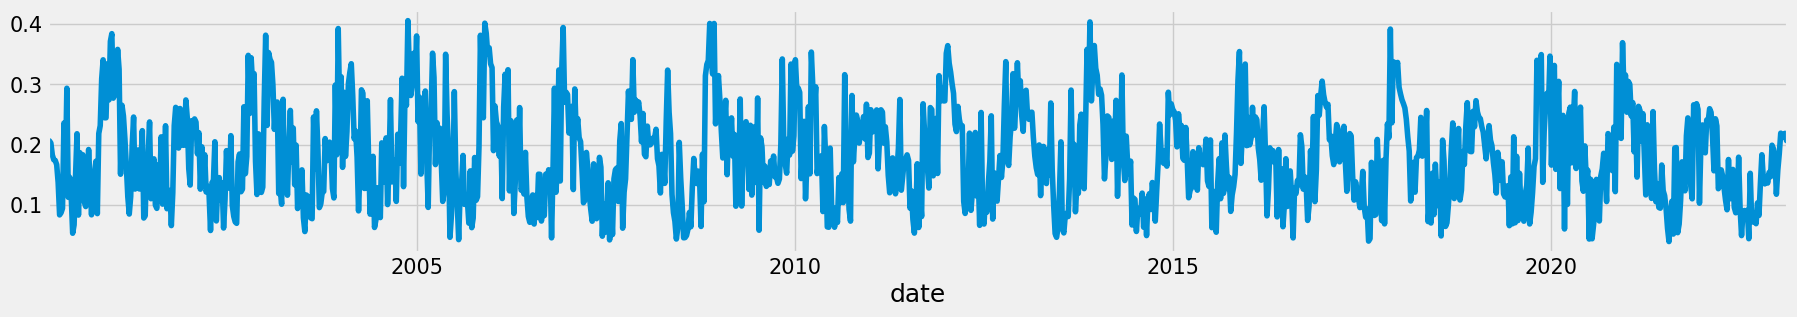

In [ ]:
plt.rc('figure',figsize=(20,3))
plt.rc('font',size=15)
ndvidata['ndvi'].plot()

In [ ]:
evidata ['date']=pd.to_datetime(all_downsampled.index, format='%m/%d/%Y')
evidata=evidata.set_index('date')
evidata['evi']=all_downsampled['evi']
evidata

,0,anomaly,evi
date,,,
2000-02-24,-0.635732,1,0.146724
2000-03-02,-0.901335,1,0.129765
2000-03-09,-1.025186,1,0.121857
2000-03-16,-0.730498,1,0.140673
2000-03-23,-1.060189,1,0.119622
...,...,...,...
2023-01-19,-0.594812,1,0.149336
2023-01-26,-0.559013,1,0.151622
2023-02-02,-0.667203,1,0.144714


In [ ]:
evianomaly = evidata.loc[evidata['anomaly'] == -1, [0]]
evianomaly.index = pd.to_datetime(evianomaly.index, format='%d/%m/%Y')
evianomaly

,0
date,
2001-08-02,-2.448168
2002-12-19,-2.174411
2003-05-22,3.642810
2004-05-06,3.608454
2006-08-03,-1.997657
2010-02-25,-2.706911
2012-03-29,-2.650976
2013-04-18,3.349712
2019-10-24,4.085019


In [ ]:
# Impute these values
for date in evianomaly.index:
  evidata.loc[evidata.index == date, 'evi'] = monthly_avg.loc[date.month, 'evi'] #odata.loc[odata.index == date, 'ndvi'].fillna(monthly_avg.loc[date.month, 'ndvi'])

In [ ]:
evidata.loc[evidata['anomaly'] == -1, 'evi']

date
2001-08-02    0.142293
2002-12-19    0.201049
2003-05-22    0.256484
2004-05-06    0.256484
2006-08-03    0.142293
2010-02-25    0.159242
2012-03-29    0.176656
2013-04-18    0.231865
2019-10-24    0.185591
2020-04-09    0.231865
2020-05-14    0.256484
2022-01-13    0.171260
Name: evi, dtype: float64

In [ ]:
evidata

,0,anomaly,evi
date,,,
2000-02-24,-0.635732,1,0.146724
2000-03-02,-0.901335,1,0.129765
2000-03-09,-1.025186,1,0.121857
2000-03-16,-0.730498,1,0.140673
2000-03-23,-1.060189,1,0.119622
...,...,...,...
2023-01-19,-0.594812,1,0.149336
2023-01-26,-0.559013,1,0.151622
2023-02-02,-0.667203,1,0.144714


<Axes: xlabel='date'>

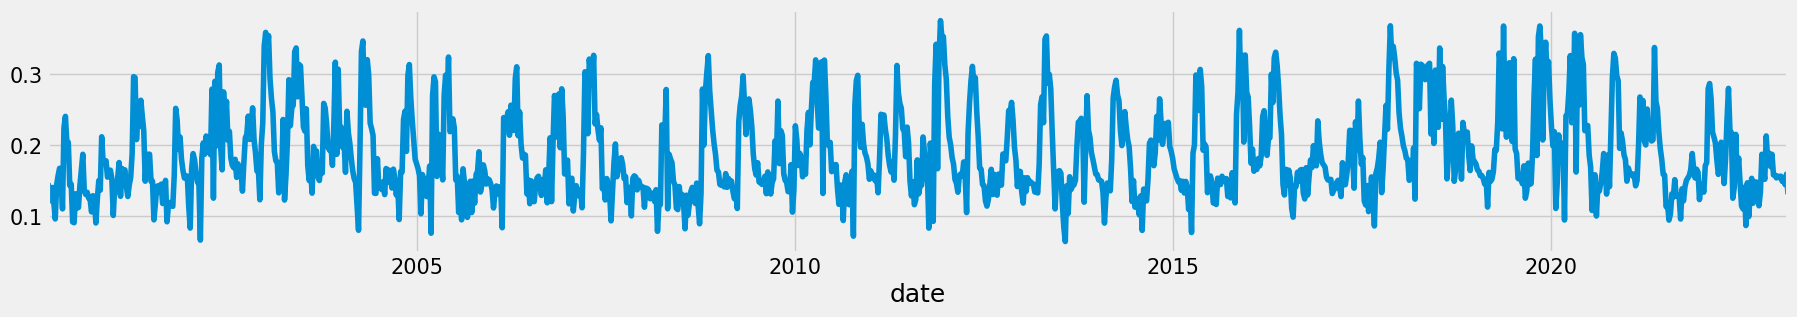

In [ ]:
plt.rc('figure',figsize=(20,3))
plt.rc('font',size=15)
evidata['evi'].plot()

In [ ]:
ndwidata ['date']=pd.to_datetime(all_downsampled.index, format='%m/%d/%Y')
ndwidata=ndwidata.set_index('date')
ndwidata['ndwi']=all_downsampled['ndwi']
ndwidata

,0,anomaly,ndwi
date,,,
2000-02-24,-1.215349,1,-0.090834
2000-03-02,-2.578339,-1,-0.145945
2000-03-09,-3.201538,-1,-0.171143
2000-03-16,-1.471103,1,-0.101175
2000-03-23,0.410686,1,-0.025088
...,...,...,...
2023-01-19,-1.960042,1,-0.120945
2023-01-26,-1.956509,1,-0.120802
2023-02-02,-2.272325,1,-0.133571


In [ ]:
ndwianomaly = ndwidata.loc[ndwidata['anomaly'] == -1, [0]]
ndwianomaly.index = pd.to_datetime(ndwianomaly.index, format='%d/%m/%Y')
ndwianomaly

,0
date,
2000-03-02,-2.578339
2000-03-09,-3.201538
2000-03-30,3.841351
2000-09-07,2.841476
2000-09-21,3.304316
2000-11-02,2.594158
2001-01-04,2.534094
2001-04-05,2.180782
2008-03-06,-2.433481


In [ ]:
# Impute these values
for date in ndwianomaly.index:
  ndwidata.loc[ndwidata.index == date, 'ndwi'] = monthly_avg.loc[date.month, 'ndwi'] #odata.loc[odata.index == date, 'ndvi'].fillna(monthly_avg.loc[date.month, 'ndvi'])

In [ ]:
ndwidata.loc[ndwidata['anomaly'] == -1, 'ndwi']

date
2000-03-02   -0.056594
2000-03-09   -0.056594
2000-03-30   -0.056594
2000-09-07   -0.056306
2000-09-21   -0.056306
2000-11-02   -0.025812
2001-01-04   -0.083038
2001-04-05   -0.003884
2008-03-06   -0.056594
2008-10-09   -0.016756
2015-10-29   -0.016756
2023-02-16   -0.083261
Name: ndwi, dtype: float64

In [ ]:
ndwidata

,0,anomaly,ndwi
date,,,
2000-02-24,-1.215349,1,-0.090834
2000-03-02,-2.578339,-1,-0.056594
2000-03-09,-3.201538,-1,-0.056594
2000-03-16,-1.471103,1,-0.101175
2000-03-23,0.410686,1,-0.025088
...,...,...,...
2023-01-19,-1.960042,1,-0.120945
2023-01-26,-1.956509,1,-0.120802
2023-02-02,-2.272325,1,-0.133571


<Axes: xlabel='date'>

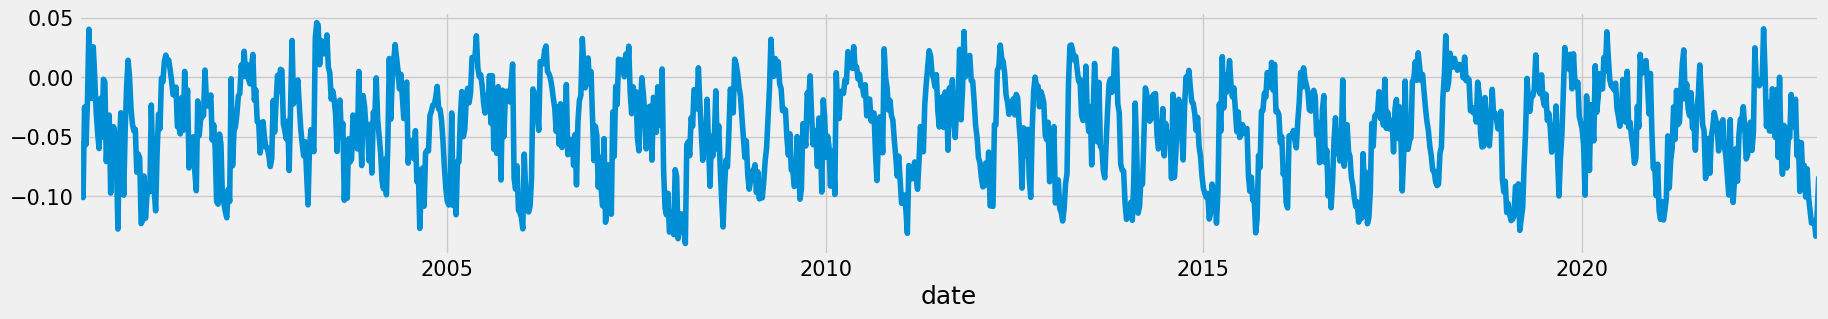

In [ ]:
plt.rc('figure',figsize=(20,3))
plt.rc('font',size=15)
ndwidata['ndwi'].plot()

 **Smoothing**

> There is some noise in realizing the forward trend here. There are some methods to model these trends and then remove them from the series. Some of the common ones are:

* Smoothing: using rolling/moving average

* Aggression: by taking the mean for a certain time period (year/month)

> Smoothing is used to simplify the seasonal pattern i.e seasonal simplification

> Smoothening of a time series may be useful in:

* Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.

* The smoothed version of series can be used as a feature to explain the original series itself.

* Visualize the underlying trend better

date
2000-02-24         NaN
2000-03-02         NaN
2000-03-09         NaN
2000-03-16         NaN
2000-03-23    0.194392
2000-03-30    0.188009
2000-04-06    0.180129
2000-04-13    0.167050
2000-04-20    0.147221
2000-04-27    0.129656
Name: ndvi, dtype: float64


<Axes: xlabel='date'>

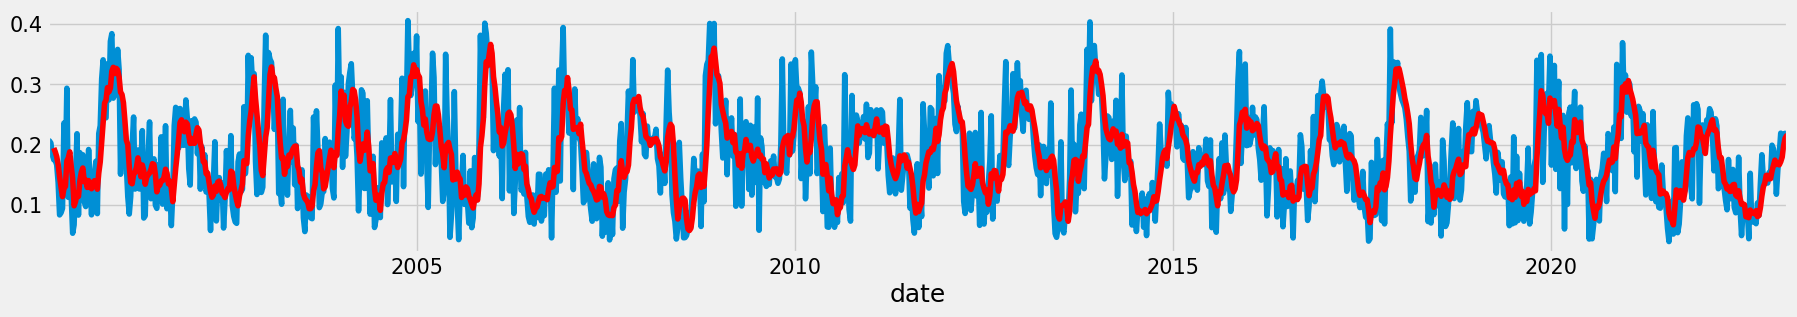

In [ ]:
from matplotlib import pyplot
rolling = ndvidata['ndvi'].rolling(window=5)
ndvirolling_mean = rolling.mean()
print(ndvirolling_mean.head(10))
# plot original and transformed dataset
ndvidata['ndvi'].plot()
ndvirolling_mean.plot(color='red')
#pyplot.show()

date
2000-02-24         NaN
2000-03-02         NaN
2000-03-09         NaN
2000-03-16         NaN
2000-03-23    0.131728
2000-03-30    0.121651
2000-04-06    0.124651
2000-04-13    0.131804
2000-04-20    0.137204
2000-04-27    0.144110
Name: evi, dtype: float64


<Axes: xlabel='date'>

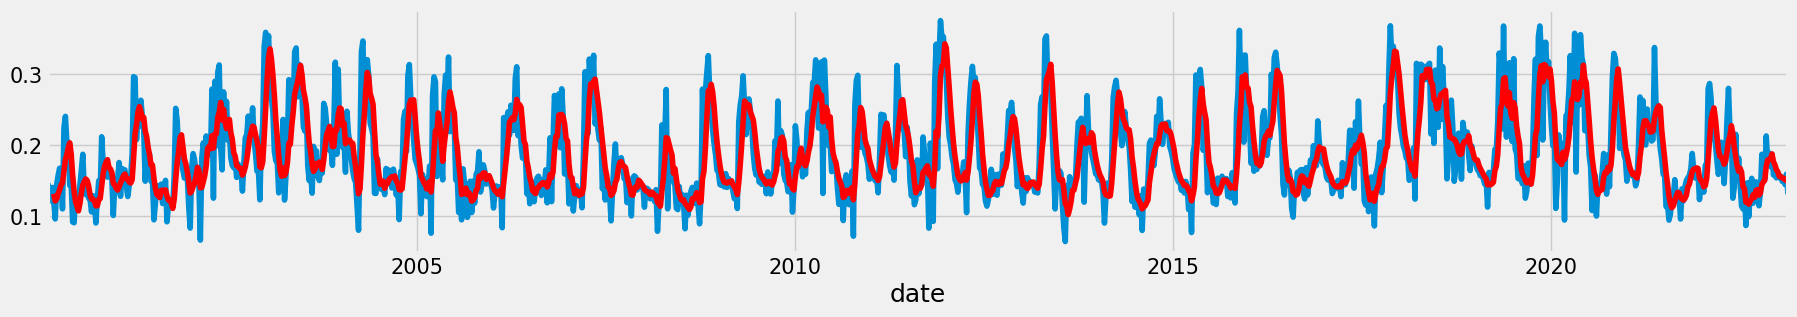

In [ ]:
from matplotlib import pyplot
rolling = evidata['evi'].rolling(window=5)
evirolling_mean = rolling.mean()
print(evirolling_mean.head(10))
# plot original and transformed dataset
evidata['evi'].plot()
evirolling_mean.plot(color='red')
#pyplot.show()

date
2000-02-24         NaN
2000-03-02         NaN
2000-03-09         NaN
2000-03-16         NaN
2000-03-23   -0.066057
2000-03-30   -0.059209
2000-04-06   -0.051936
2000-04-13   -0.032578
2000-04-20   -0.013235
2000-04-27   -0.011784
Name: ndwi, dtype: float64


<Axes: xlabel='date'>

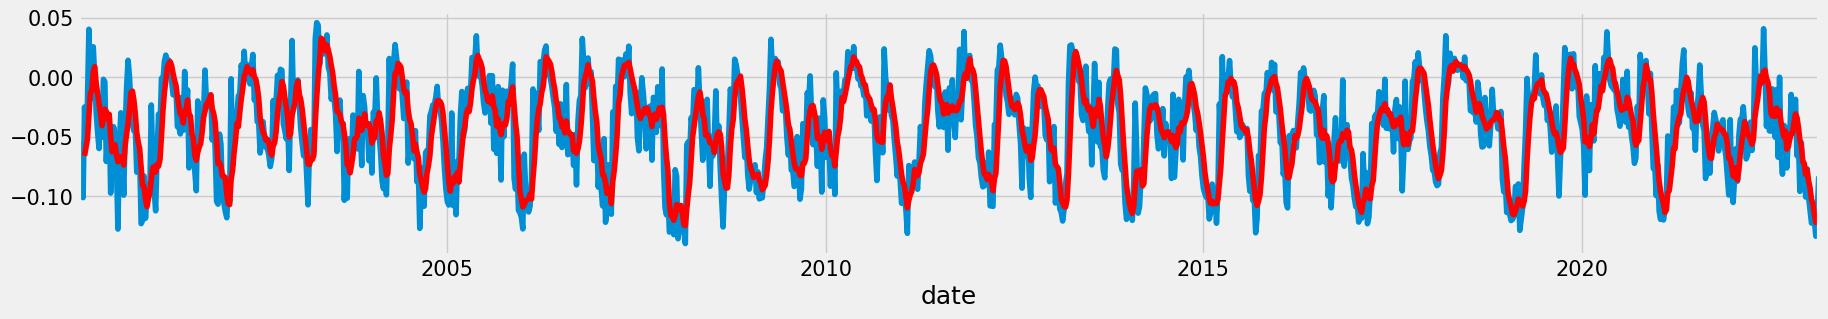

In [ ]:
from matplotlib import pyplot
rolling = ndwidata['ndwi'].rolling(window=5)
ndwirolling_mean = rolling.mean()
print(ndwirolling_mean.head(10))
# plot original and transformed dataset
ndwidata['ndwi'].plot()
ndwirolling_mean.plot(color='red')
#pyplot.show()

Text(0.5, 1.0, 'ndwi')

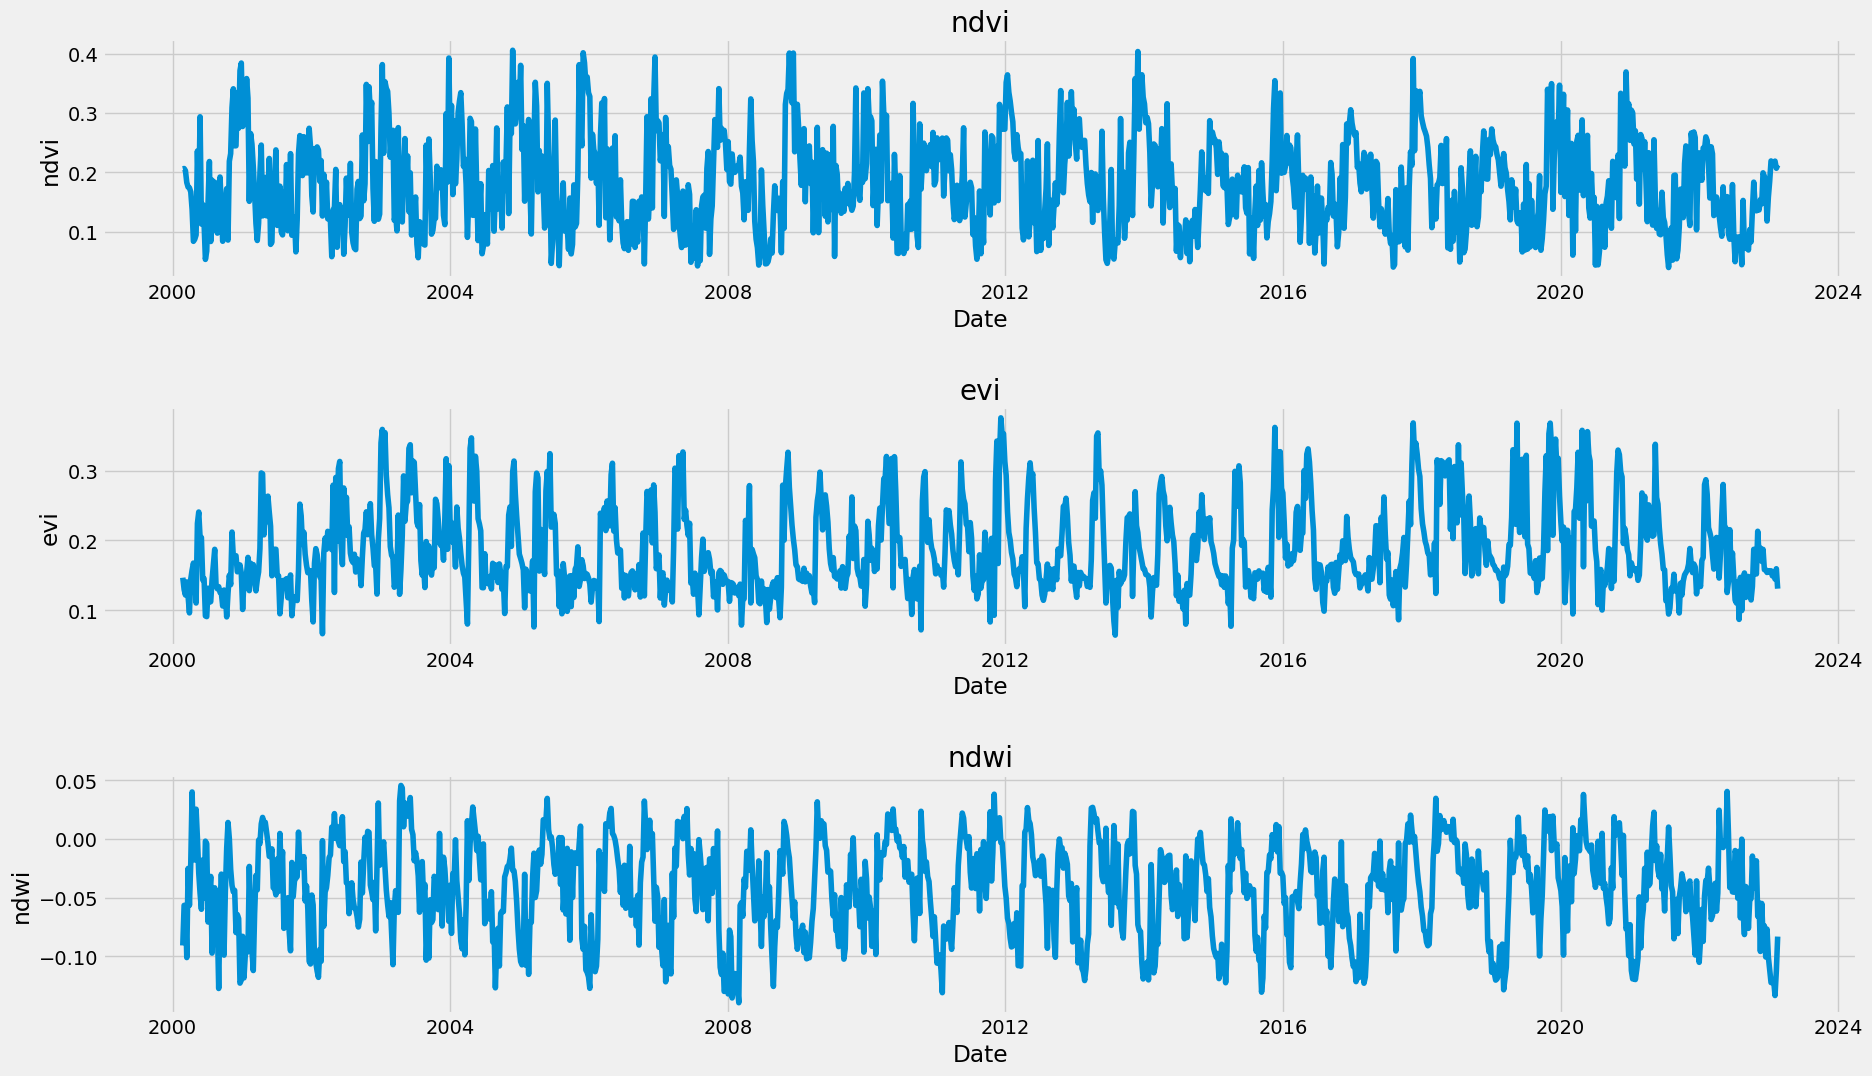

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20, 12), squeeze=False)
fig.tight_layout(pad=5)
plt.style.use('fivethirtyeight')

# Graph for SPI
axes[0][0].plot(ndvidata["ndvi"])
axes[0][0].set_ylabel("ndvi")
axes[0][0].set_xlabel("Date")
axes[0][0].set_title('ndvi')

# Graph for NDVI
axes[1][0].plot(evidata["evi"])
axes[1][0].set_ylabel("evi")
axes[1][0].set_xlabel("Date")
axes[1][0].set_title('evi')

# Graph for NDWI
axes[2][0].plot(ndwidata["ndwi"])
axes[2][0].set_ylabel("ndwi")
axes[2][0].set_xlabel("Date")
axes[2][0].set_title('ndwi')

Text(0.5, 1.0, 'smoothed ndwi')

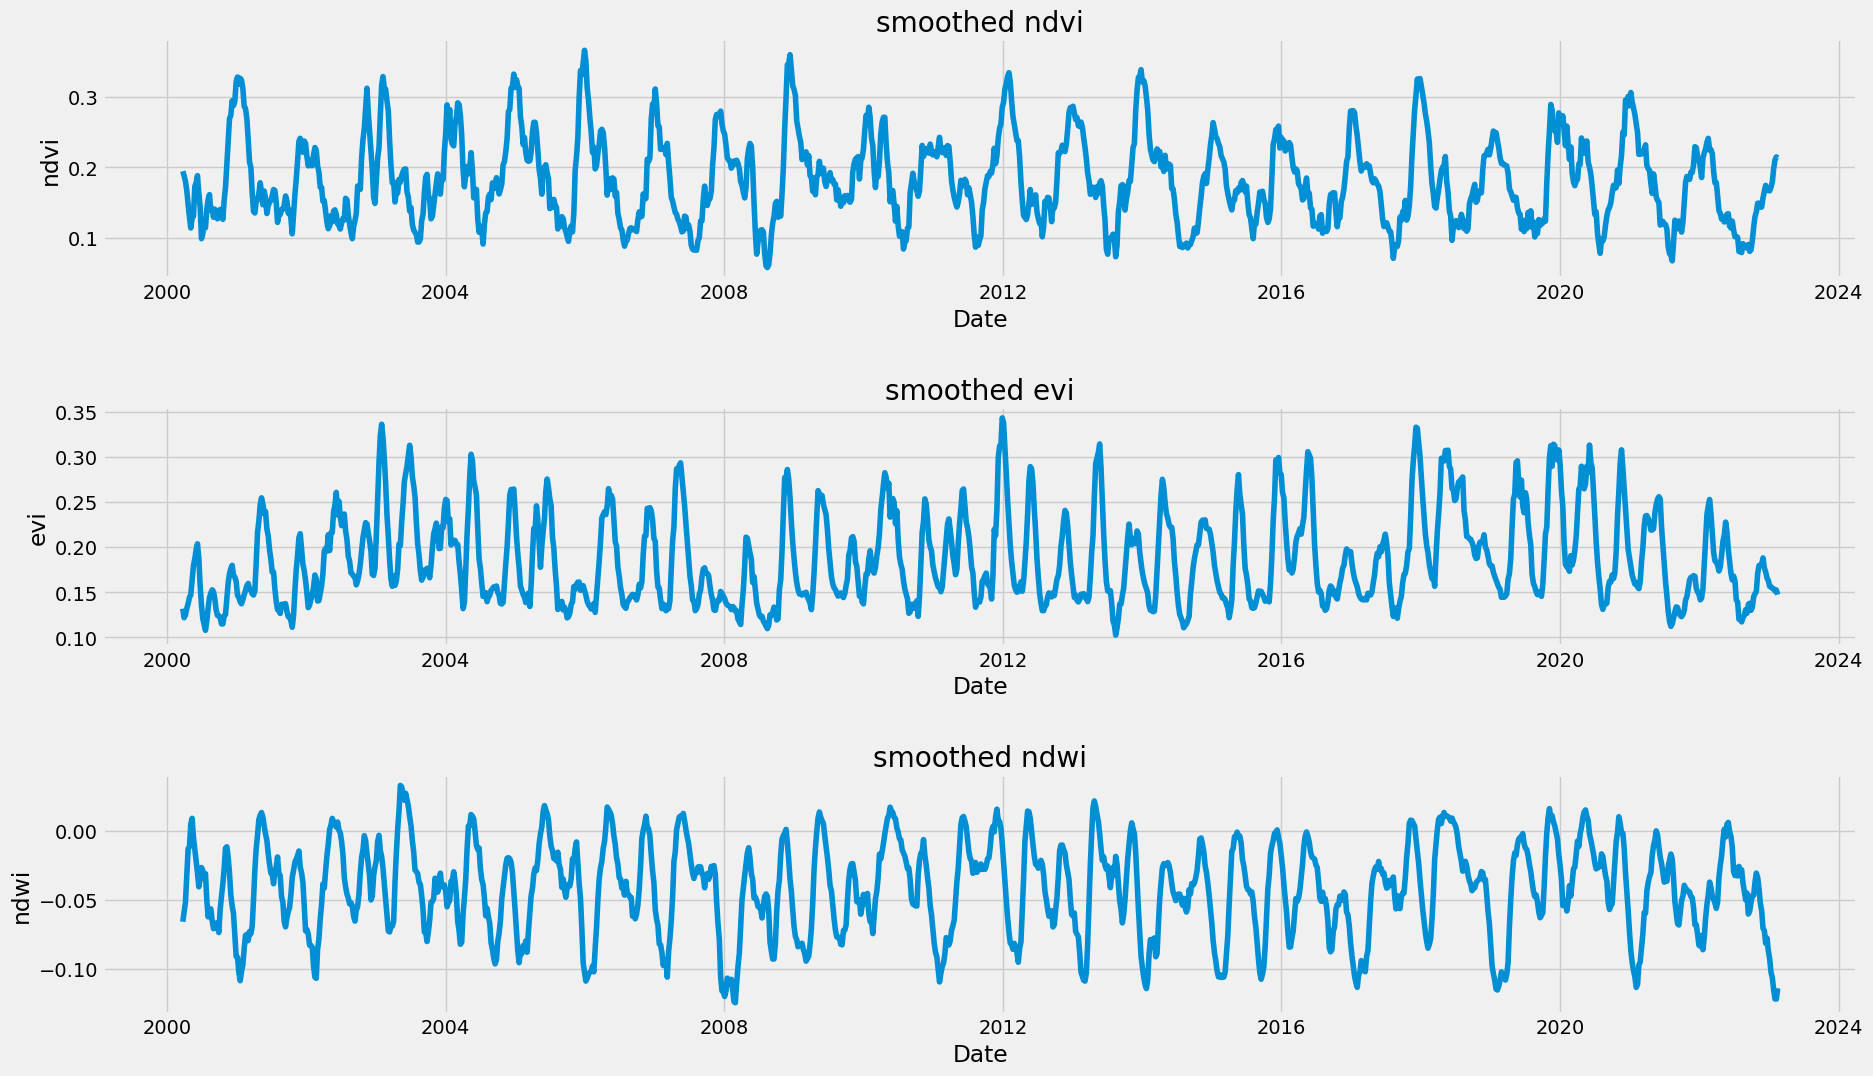

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=1, figsize=(20, 12), squeeze=False)
fig.tight_layout(pad=5)
plt.style.use('fivethirtyeight')

# Graph for SPI
axes[0][0].plot(ndvirolling_mean)
axes[0][0].set_ylabel("ndvi")
axes[0][0].set_xlabel("Date")
axes[0][0].set_title('smoothed ndvi')

# Graph for NDVI
axes[1][0].plot(evirolling_mean)
axes[1][0].set_ylabel("evi")
axes[1][0].set_xlabel("Date")
axes[1][0].set_title('smoothed evi')

# Graph for NDWI
axes[2][0].plot(ndwirolling_mean)
axes[2][0].set_ylabel("ndwi")
axes[2][0].set_xlabel("Date")
axes[2][0].set_title('smoothed ndwi')

In [ ]:
ndvidata=ndvirolling_mean[4:]
evidata=evirolling_mean[4:]
ndwidata=ndwirolling_mean[4:]

In [ ]:
ndvi_data = pd.DataFrame(ndvidata)
evi_data = pd.DataFrame(evidata)
ndwi_data = pd.DataFrame(ndwidata)

In [ ]:
clean_MODISData = ndvi_data.join(evi_data)

In [ ]:
clean_MODISData = clean_MODISData.join(ndwi_data)
clean_MODISData

,ndvi,evi,ndwi
date,,,
2000-03-23,0.194392,0.131728,-0.066057
2000-03-30,0.188009,0.121651,-0.059209
2000-04-06,0.180129,0.124651,-0.051936
2000-04-13,0.167050,0.131804,-0.032578
2000-04-20,0.147221,0.137204,-0.013235
...,...,...,...
2023-01-19,0.179294,0.154222,-0.106630
2023-01-26,0.198209,0.153708,-0.115402
2023-02-02,0.210345,0.151326,-0.121956


In [ ]:
# clean_MODISData.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/clean_MODISData.csv')

### Coorelation analysis

In [ ]:
original_cols = ['ndvi',
                 'evi',
                 'ndwi']

corrmat = clean_MODISData[original_cols].corr()
corrmat.style.background_gradient(cmap = 'RdYlGn')

,ndvi,evi,ndwi
ndvi,1.000000,0.281992,-0.284805
evi,0.281992,1.000000,0.615421
ndwi,-0.284805,0.615421,1.000000


* positive correlation between evi & ndvi, evi & ndwi
* negative correlation between ndvi&ndwi
> Here we can observe that there is no strong correlation except between ndwi and evi
> Coorelation between indices increased for seasonally adjested data
